In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MAHIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
df = pd.read_csv('./data/new_papers.csv')
df = df.drop_duplicates()
print(df.shape)
df.head()

(49296, 5)


,Conference,Year,Title,Author,Affiliation
0,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,Yingxue Wang,"Swiss Federal Institute of Technology, Zurich"
1,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,Rodney J Douglas,Institute of Neuroinformatics
2,NeurIPS,2006,Attentional Processing on a Spike-Based VLSI N...,Shih-Chii Liu,"Institute for Neuroinformatics, University of ..."
3,NeurIPS,2006,Multi-Task Feature Learning,Andreas Argyriou,Ecole Centrale de Paris
4,NeurIPS,2006,Multi-Task Feature Learning,Theos Evgeniou,INSEAD


In [10]:
data = df['Title'].explode().unique()

In [11]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]

In [12]:
tagged_data[:5]

[TaggedDocument(words=['attentional', 'processing', 'on', 'a', 'spike-based', 'vlsi', 'neural', 'network'], tags=['0']),
 TaggedDocument(words=['multi-task', 'feature', 'learning'], tags=['1']),
 TaggedDocument(words=['a', 'rate-distortion', 'approach', 'to', 'joint', 'pattern', 'alignment'], tags=['2']),
 TaggedDocument(words=['context', 'effects', 'in', 'category', 'learning', ':', 'an', 'investigation', 'of', 'four', 'probabilistic', 'models'], tags=['3']),
 TaggedDocument(words=['comparative', 'gene', 'prediction', 'using', 'conditional', 'random', 'fields'], tags=['4'])]

In [21]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm = 0)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

In [22]:
model.save("./assets/d2v.model")
print("Model Saved")

Model Saved


In [23]:
temp_model = model

In [24]:
model= Doc2Vec.load("./assets/d2v.model")

In [25]:
model= Doc2Vec.load("./assets/d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("I love chatbots".lower())
v1 = model.infer_vector(test_data)
print("V1_infer", v1)

# to find most similar doc using tags
similar_doc = model.docvecs.most_similar('1')
print(similar_doc)

# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.docvecs['1'])

V1_infer [-0.11761708 -0.02214176  0.14515603 -0.09987899 -0.01099681  0.01713581
 -0.12182685 -0.07585438 -0.06130126  0.02854563  0.00179626  0.09377886
 -0.04359838  0.13938458  0.06054613 -0.01543916 -0.04054012 -0.07153811
  0.00886612 -0.04245569]


C:\Users\MAHIKA\AppData\Local\Temp\ipykernel_28328\1015966735.py:8: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  similar_doc = model.docvecs.most_similar('1')


[('4147', 0.9009073972702026), ('8986', 0.8515761494636536), ('2165', 0.839266836643219), ('11669', 0.8338145017623901), ('1896', 0.8334353566169739), ('5366', 0.8333684206008911), ('4845', 0.8328126668930054), ('1705', 0.8322224020957947), ('12425', 0.830976665019989), ('1414', 0.8302884101867676)]
[-1.1511896  -0.8862417   1.136339   -0.4533122   0.6660761  -0.70663875
  0.6818575  -0.5741899   0.3944933   0.4704267   0.8484096   0.36100903
  0.0593525   2.1841767   0.2276707  -0.5585859   0.07464463 -0.7543868
  0.2710258   1.122398  ]


C:\Users\MAHIKA\AppData\Local\Temp\ipykernel_28328\1015966735.py:12: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  print(model.docvecs['1'])


In [26]:
list(model.wv.vocab.items())[:5]

AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

In [28]:
title_embeddings = []
# for i in range(len(model.docvecs)):
for i in range(100):
  temp = model.docvecs[i]
  title_embeddings.append(temp)
title_embeddings = np.array(title_embeddings)

C:\Users\MAHIKA\AppData\Local\Temp\ipykernel_28328\338211467.py:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  temp = model.docvecs[i]


In [29]:
print(type(title_embeddings))
print(type(title_embeddings[0]))
title_embeddings[:5]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([[-0.44085518,  1.2876868 ,  1.0149361 , -1.5619195 ,  0.71958053,
        -0.7046075 , -3.1385162 , -0.8460909 ,  0.29075068, -2.729757  ,
        -1.9066424 ,  1.0171617 ,  2.1519902 ,  3.2519345 ,  0.7662354 ,
         0.09284754, -0.19611257, -1.0221146 ,  0.07754012,  1.0171894 ],
       [-1.1511896 , -0.8862417 ,  1.136339  , -0.4533122 ,  0.6660761 ,
        -0.70663875,  0.6818575 , -0.5741899 ,  0.3944933 ,  0.4704267 ,
         0.8484096 ,  0.36100903,  0.0593525 ,  2.1841767 ,  0.2276707 ,
        -0.5585859 ,  0.07464463, -0.7543868 ,  0.2710258 ,  1.122398  ],
       [-1.6546516 , -1.878843  ,  3.2909744 , -1.9078486 , -0.82693344,
         1.585865  ,  0.00402441, -1.7932957 , -0.98304623, -0.2804061 ,
        -1.725679  ,  0.8409031 , -0.6789663 ,  1.086976  , -1.2229458 ,
         0.08132533,  0.07302719,  0.85851455,  0.22113597,  2.8665552 ],
       [-2.9025395 , -1.8851333 ,  0.8209829 ,  1.1309232 , -0.3015924 ,
        -0.28016096, -1.5019313 , -1.1959192 , -

In [30]:
similarity_matrix = cosine_similarity(title_embeddings)
print(similarity_matrix.shape)

(100, 100)


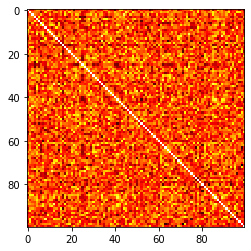

In [31]:
a = similarity_matrix
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

uniform_data = similarity_matrix
ax = sns.heatmap(uniform_data, linewidth=0.5)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [33]:
# create nx graph from sim matrix
G = nx.to_networkx_graph(similarity_matrix)

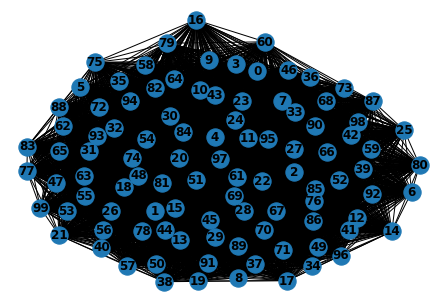

In [34]:
nx.draw(G, with_labels=True, font_weight='bold')

In [36]:
def create_node_trace(G):
    # collect node information from G to plot
    node_x = []
    node_y = []
    node_text = []
    node_color = []

    for i, node in enumerate(G.nodes(data=True)):
        # get node x,y position and store
        x, y = node[1]['pos']
        node_x.append(x)
        node_y.append(y)

        node_text.append(node[1]['text'])
        node_color.append(node[1]['color'])

    # create node trace (i.e., scatter plot)
    # make it invisible by default
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=False,
            color=node_color,
            size=16,
            line_width=0.5,
        ),
        text=node_text,
        visible=False
    )

    return node_trace

In [37]:
def create_edge_trace(G):
    # collect edges information from G to plot
    edge_weight = []
    edge_text = []
    edge_pos = []
    edge_color = []
    
    for edge in G.edges(data=True):
        
        # edge is line connecting two points
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        edge_pos.append([[x0, x1, None], [y0, y1, None]])
        
        # edge line color when drawn
        edge_color.append("black")

    # there is a trace for each edge
    edge_traces = []
    for i in range(len(edge_pos)):
        
        # edge line width
        line_width = 1

        # is scatter because it is line connecting two points
        trace = go.Scatter(
            x=edge_pos[i][0], y=edge_pos[i][1],
            line=dict(width=line_width, color=edge_color[i]),
            mode='lines',
            visible=False
        )
        edge_traces.append(trace)

    return edge_traces

In [38]:
def filter_similarity_matrix_at_step(square_matrix, step_value):
    # copy matrix
    aux = square_matrix.copy()
    
    # set as NaN all values equal to or below threshold value
    aux[aux <= step_value] = np.nan
    
    # return filtered matrix
    return aux

In [40]:
def get_interactive_slider_similarity_graph(square_matrix, slider_values, node_text=None, yaxisrange=None, xaxisrange=None):
    
    # Create figure with plotly
    fig = go.Figure()

    # key: slider value
    # value: list of traces to display for that slider value
    slider_dict = {}
    
    # total number of traces
    total_n_traces = 0
    
    # node positions on plot
    #node_pos = None

    # for each possible value in the slider, create and store traces (i.e., plots)
    for i, step_value in enumerate(slider_values):

        # update similarity matrix for the current step
        aux = filter_similarity_matrix_at_step(square_matrix, step_value)

        # create nx graph from sim matrix
        G = nx.to_networkx_graph(aux)
        
        # remove edges for 0 weight (NaN)
        G.remove_edges_from([(a, b) for a, b, attrs in G.edges(data=True) if np.isnan(attrs["weight"])])

        # assign node positions if None
        node_pos = nx.nx_pydot.graphviz_layout(G)

        # populate nodes with meta information
        for node in G.nodes(data=True):
            
            # node position
            node[1]['pos'] = node_pos[node[0]]

            # node color
            node[1]['color'] = "orange"

            # node text on hover if any is specified else is empty
            if node_text is not None:
                node[1]['text'] = node_text[node[0]]
            else:
                node[1]['text'] = ""

        # create edge taces (each edge is a trace, thus this is a list)
        edge_traces = create_edge_trace(G)
        
        # create node trace (a single trace for all nodes, thus it is not a list)
        node_trace = create_node_trace(G) 

        # store edge+node traces as single list for the current step value
        slider_dict[step_value] = edge_traces + [node_trace]
        
        # keep count of the total number of traces
        total_n_traces += len(slider_dict[step_value])

        # make sure that the first slider value is active for visualization
        if i == 0:
            for trace in slider_dict[step_value]:
                # make visible
                trace.visible = True

                
    # Create steps objects (one step per step_value)
    steps = []
    for step_value in slider_values:
        
        # count traces before adding new traces
        n_traces_before_adding_new = len(fig.data)
        
        # add new traces
        fig.add_traces(slider_dict[step_value])

        step = dict(
            # update figure when this step is active
            method="update",
            # make all traces invisible
            args=[{"visible": [False] * total_n_traces}],
            # label on the slider
            label=str(round(step_value, 3)),
        )

        # only toggle this step's traces visible, others remain invisible
        n_traces_for_step_value = len(slider_dict[step_value])
        for i in range(n_traces_before_adding_new, n_traces_before_adding_new + n_traces_for_step_value):
            step["args"][0]["visible"][i] = True
        
        # store step object in list of many steps
        steps.append(step)

    # create slider with list of step objects
    slider = [dict(
        active=0,
        steps=steps
    )]

    # add slider to figure and create layout
    fig.update_layout(
        sliders=slider,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(range=xaxisrange, showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(range=yaxisrange, showgrid=False, zeroline=False, showticklabels=False),
        width=700, height=700,
    )

    return fig

In [47]:
# define slider steps (i.e., threshold values)
slider_steps = np.arange(0.4, 0.85, 0.05)
    
# get the slider figure
fig = get_interactive_slider_similarity_graph(
    similarity_matrix,
    slider_steps,
    node_text = data[:100]
)

# plot it
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [45]:
import pydot

In [46]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
def mbkmeans_clusters(
	X, 
    k, 
    mb, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [ ]:
clustering, cluster_labels = mbkmeans_clusters(
	X=data,
    k=50,
    mb=500,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "text": data,
    "tokens": [" ".join(text) for text in data],
    "cluster": cluster_labels
})

In [ ]:
print("Most representative terms per cluster (based on centroids):")
for i in range(50):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")